<a href="https://colab.research.google.com/github/slanucha/deep_learning_colab/blob/master/Autoregressive_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

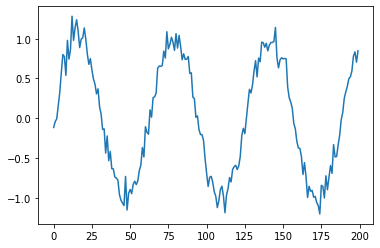

In [ ]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

In [ ]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, "Y shape:", Y.shape)

X.shape: (190, 10) Y shape: (190,)


Model

In [ ]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

In [ ]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 31ms/step - loss: 0.2499 - val_loss: 0.1313
Epoch 2/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0827 - val_loss: 0.1408
Epoch 3/80
3/3 [==============================] - 0s 7ms/step - loss: 0.1364 - val_loss: 0.0283
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0678 - val_loss: 0.1138
Epoch 5/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0687 - val_loss: 0.0345
Epoch 6/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0589 - val_loss: 0.0653
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0404 - val_loss: 0.0360
Epoch 8/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0434 - val_loss: 0.0335
Epoch 9/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0262 - val_loss: 0.0354
Epoch 10/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0319 - val_loss: 0.0241
Epoch 11/80
3/3 [=====================

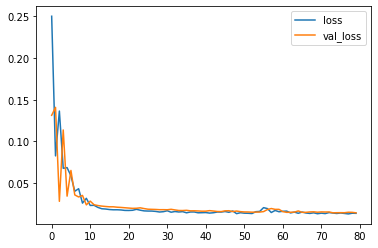

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Forecast

In [ ]:
sive validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0]
  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

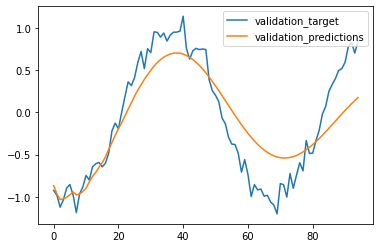

In [ ]:
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()
plt.show()